# Setting up

Building on top of Jacob's notebook to explore other variables individually

[Skip to exploration](#depth)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('diamonds.csv')

In [2]:
# Get indexes for which x, y, z < 0 or y, z > 30
incorrect_value_indexes = df[
    (df["x"] < 1) | 
    (df["y"] > 30) | 
    (df["y"] < 1) | 
    (df["z"] > 30) | 
    (df["z"] < 1)].index

# Delete these row indexes from dataFrame
data = df.drop(incorrect_value_indexes)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [7]:
data.loc[data['cut'] == 'Very Good', 'cut'] = 'Very_Good'

In [8]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [9]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


In [50]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.716e+04
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:            -4.5524e+05
No. Observations:               53917   AIC:                         9.105e+05
Df Residuals:                   53893   BIC:                         9.107e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5012.9949    654.932     -7.654

# Exploring the predictive qualities of Depth <a id="depth"></a>

From the Phase 1 data exploration, we found that depth had little to no association with price. To confirm our findings we fit an OLS model to fit depth, alone, against price.
* We observe that there is an R-squared of 0.000
* 0% of the variance in price can be explained by depth

We may consider dropping this variable, however, we will test depth against carat to see if depth has a different effect when paired with another variable.
* price ~ carat produces an R-squared value of 0.849
* price ~ carat + depth produces an R-squared value of 0.851

It appears as if Depth assists in explaining variance in price when paired with other variables.
(side note: **see why Adj. R-squared is the same as R-squared, even for regression analyses with very few independent variables**)

<AxesSubplot:xlabel='depth', ylabel='price'>

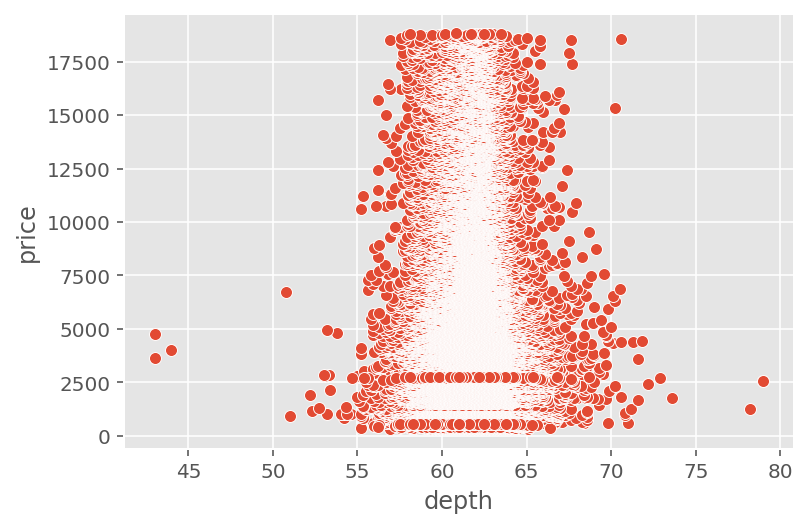

In [4]:
sns.scatterplot(x=data['depth'], y=data['price'])

In [34]:
test_string_encoded = 'price ~ depth'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.119
Date:                Fri, 15 Oct 2021   Prob (F-statistic):             0.0134
Time:                        13:52:33   Log-Likelihood:            -5.2352e+05
No. Observations:               53917   AIC:                         1.047e+06
Df Residuals:                   53915   BIC:                         1.047e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5762.0334    740.460      7.782      0.0

In [36]:
test_string_encoded = 'price ~ carat'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.039e+05
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:53:18   Log-Likelihood:            -4.7250e+05
No. Observations:               53917   AIC:                         9.450e+05
Df Residuals:                   53915   BIC:                         9.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2255.8565     13.053   -172.823      0.0

In [35]:
test_string_encoded = 'price ~ depth + carat'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:53:08   Log-Likelihood:            -4.7226e+05
No. Observations:               53917   AIC:                         9.445e+05
Df Residuals:                   53914   BIC:                         9.445e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4065.4842    286.169     14.207      0.0

### Exploring the predictive qualities of Table

From the Phase 1 data exploration, we also found that table had little to no association with price. To confirm our findings we fit an OLS model to fit table, alone, against price.
* We observe that there is an R-squared of 0.016
* 1.6% of the variance in price can be explained by table

It is an extremely weak correlation, however, will improve the R-squared value of our model.

<AxesSubplot:xlabel='table', ylabel='price'>

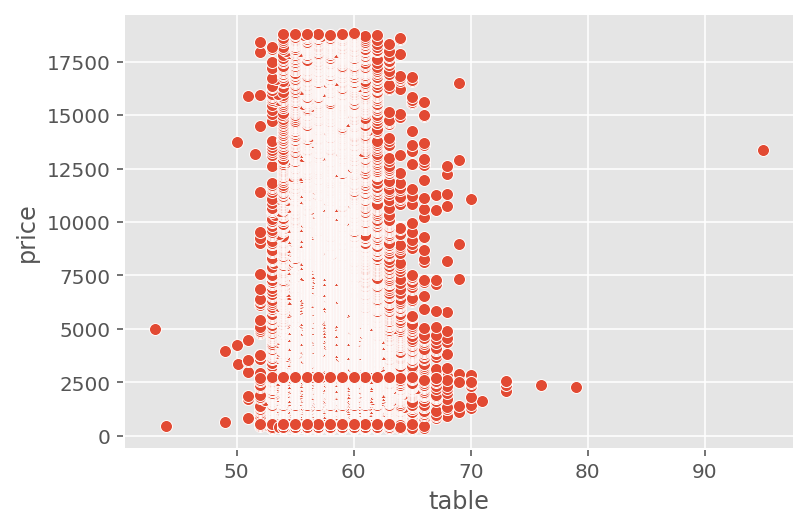

In [33]:
sns.scatterplot(x=data['table'], y=data['price'])

In [46]:
test_string_encoded = 'price ~ table'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded[["price", "table"]])
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     887.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          2.14e-193
Time:                        14:04:57   Log-Likelihood:            -5.2308e+05
No. Observations:               53917   AIC:                         1.046e+06
Df Residuals:                   53915   BIC:                         1.046e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9117.0848    438.374    -20.798      0.0

## Full Model Diagnostic Checks

We observe a clear non-linear relationship in the residual plots, which suggests that transformation of our data may be required or that a linear regression model may not be that suitable.

In [52]:

residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})

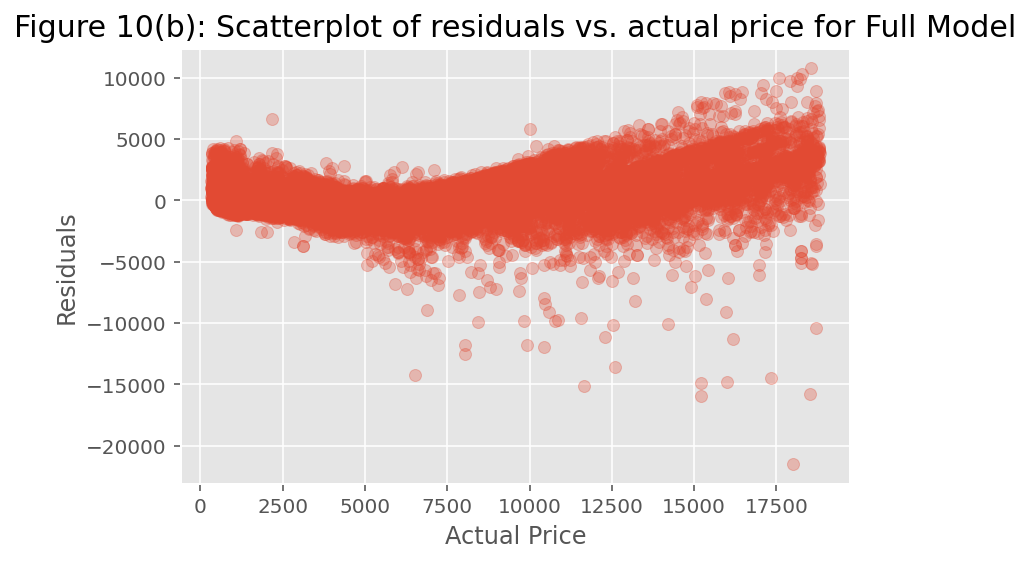

In [53]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

## Transformations

We will individually transform variables to test if we can increase the R-squared value of our model.
From Phase 1, we observed that X, Y, Z variables had very clear non-linear associations with price, following a squared or cubic pattern. 

In order to attempt to linearise this, we will apply an x squared and x cubed transformation to the variable.

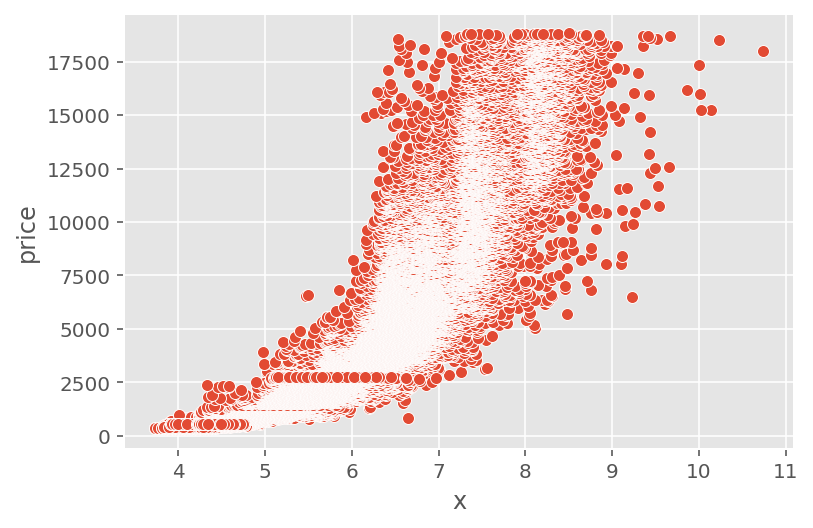

In [92]:
sns.scatterplot(x="x", y="price", data=data_encoded)
plt.show()

<AxesSubplot:xlabel='x_squared', ylabel='price'>

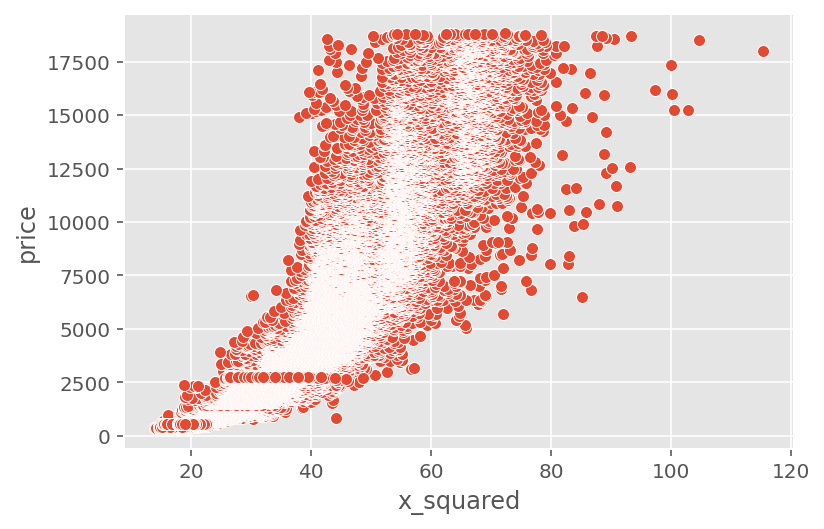

In [93]:
data_encoded["x_squared"] = data_encoded["x"] ** 2
sns.scatterplot(x="x_squared", y="price", data=data_encoded)

<AxesSubplot:xlabel='x_cubed', ylabel='price'>

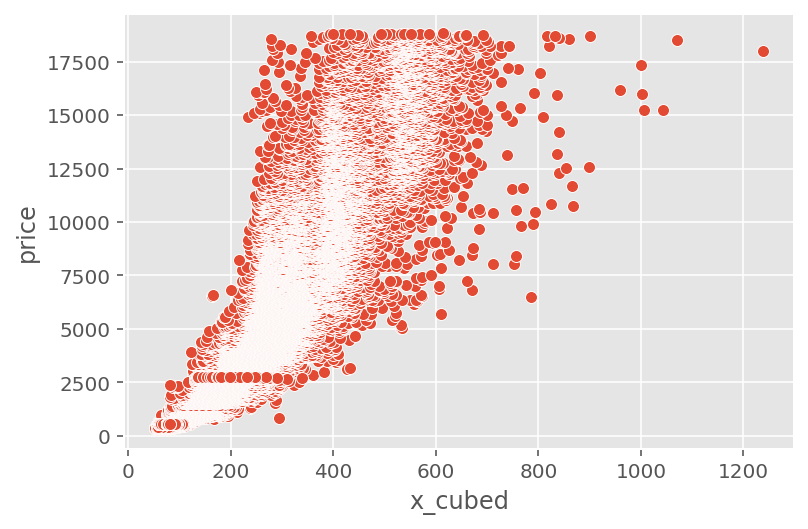

In [94]:
data_encoded["x_cubed"] = data_encoded["x"] ** 3
sns.scatterplot(x="x_cubed", y="price", data=data_encoded)

<AxesSubplot:xlabel='x_fourth', ylabel='price'>

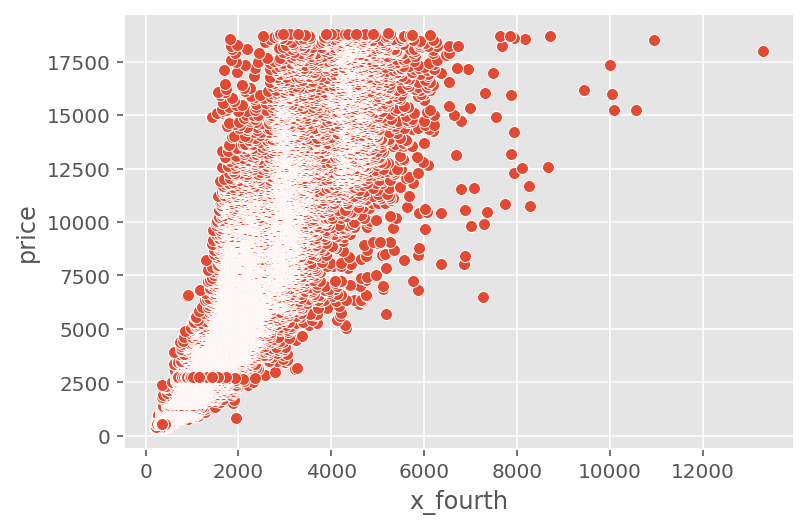

In [95]:
data_encoded["x_fourth"] = data_encoded["x"] ** 4
sns.scatterplot(x="x_fourth", y="price", data=data_encoded)

In [99]:
test_string_encoded = 'price ~ x'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X produces R-Squared value of:  0.7871614773999794


In [164]:
test_string_encoded = 'price ~ x_squared'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X^2 produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X^2 produces R-Squared value of:  0.8274480050613037


In [165]:
test_string_encoded = 'price ~ x_cubed'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X^3 produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X^3 produces R-Squared value of:  0.850171465606506


In [166]:
test_string_encoded = 'price ~ x_fourth'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X^4 produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X^4 produces R-Squared value of:  0.8525233927426286


We can see the R-squared value approach a value of ~0.85 as we increase the power of the x transformation. X^4 appears to yield the highest R-squared value.

Todo: **Graph line plot of X power vs R-squared value to visualise**

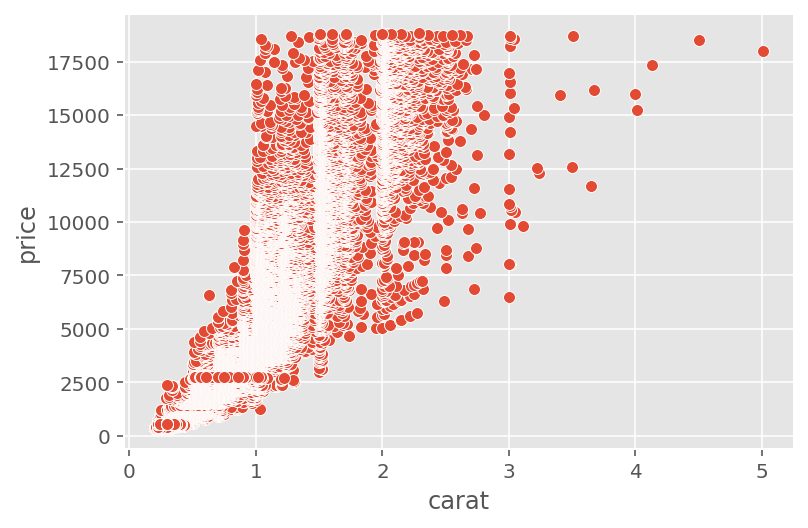

In [134]:
sns.scatterplot(x="carat", y="price", data=data_encoded)
plt.show()

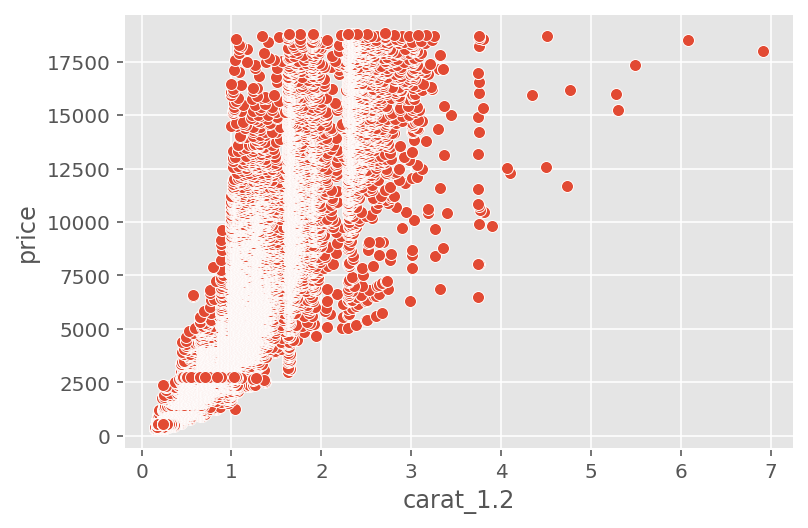

In [153]:
data_encoded["carat_1.2"] = data_encoded["carat"] ** 1.2
sns.scatterplot(x="carat_1.2", y="price", data=data_encoded)
plt.show()

In [146]:
test_string_encoded = 'price ~ carat'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X produces R-Squared value of:  0.8493201274671618


In [156]:
test_string_encoded = 'price ~ carat_squared'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("OLS model for Price ~ X produces R-Squared value of: ", model_full_fitted.rsquared)

OLS model for Price ~ X produces R-Squared value of:  0.8533857937003275


Price ~ Carat reaches a max R-Squared when we transform Carat ^ 1.2. The increased benefits are very marginal and would make interpretation of the carat variable difficult and tedious. It is probably not worth it to apply this transformation.

**Based on phase 1, carat can be quite predictably calculated based on cuboidal volume (x*y*z), this may mean that transforming the 3 dimensional variables and dropping carat may yield a stronger model.**

### Applying transformations to the entire model

When we test the R-squared value of price ~ x + all other **categorical** variables, we get an R-Squared value of **0.843756**

When we test the R-squared value of price ~ x^4 + all other **categorical** variables, we get an R-Squared value of **0.9109**

* As the only numerical variable in the model, transforming x increases the strength of the model

In [162]:
test_string_encoded = 'price ~ x + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("R-Squared of price ~ x and all CATEGORICAL variables: ", model_full_fitted.rsquared)

R-Squared of price ~ x and all CATEGORICAL variables:  0.8437568668937631


In [163]:
test_string_encoded = 'price ~ x_fourth + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("R-Squared of price ~ x^4 and all CATEGORICAL variables: ", model_full_fitted.rsquared)

R-Squared of price ~ x^4 and all CATEGORICAL variables:  0.9108991555022053


When we test the R-squared value of price ~ x + all other **categorical + numerical** variables, we get an R-Squared value of **0.9206**

However, when we test the R-squared value of price ~ x^4 + all other **categorical + numerical** variables, we get an R-Squared value of **0.9203**

* When we mix x^4 with other original numerical variables, the predictive strength of the model is decreased.
* This suggests that x may need to be transformed in conjunction with the other variables

In [131]:
test_string_encoded = 'price ~ x + carat + y + z + depth + table + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("R-Squared of price ~ x and ALL other variables: ", model_full_fitted.rsquared)

R-Squared of price ~ x and ALL other variables:  0.9205774447870843


In [130]:
test_string_encoded = 'price ~ x_fourth + carat + y + z + depth + table + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
model_full = sm.formula.ols(formula=test_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print("R-Squared of price ~ x^4 and ALL other variables: ", model_full_fitted.rsquared)

R-Squared of price ~ x^4 and ALL other variables:  0.920275117192205
